In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [116]:
# Read the csv file into a pandas DataFrame
abnb_90 = pd.read_csv('../abnb_df_90.csv')

In [117]:
abnb_90['host_listings_count'] = abnb_90['host_listings_count'].fillna(0)

In [118]:
# abnb_90 = abnb_90.rename(columns={'host_listings_count': 'calculated_host_listings_count'})
# abnb_90 = abnb_90['host_listings_count'].astype(np.int64)
# abnb_90 = abnb_90.drop(columns={'neighbourhood.1'})`


In [119]:
abnb_nrows = len(abnb_90.index)
abnb_nrows

28127

In [120]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = abnb_90.host_listings_count.values.reshape(-1, 1)
y = abnb_90.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (28127, 1) (28127, 1)


array([[25.],
       [50.],
       [ 3.],
       ...,
       [ 2.],
       [ 1.],
       [ 6.]])

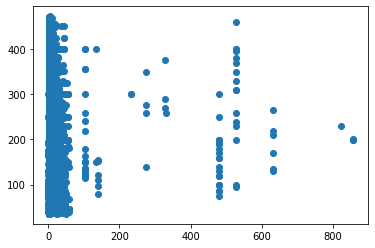

In [121]:
# Plot the data

plt.scatter(X, y)


In [122]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [123]:
abnb_90 = abnb_90.replace([np.inf, -np.inf], np.nan, inplace=True)

In [124]:
# Fit the model to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.22519607]]
y-axis intercept:  [127.73969477]


In [126]:
 # Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[855.]]


In [127]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

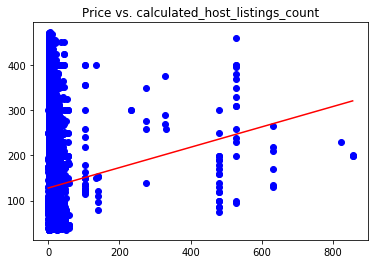

In [128]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

# sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("Price vs. calculated_host_listings_count")

plt.savefig('linear_reg_calculated_host_listings_count.png')

In [129]:
# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print (model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

0.004472026669912199 0.004436630119749374


In [130]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()
#print dir(result)
print (result.rsquared, result.rsquared_adj)

0.004472026669912421 0.004436630119749596
